In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from math import sqrt

In [2]:
house_data=pd.read_csv('Housing.csv')

In [3]:
house_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


In [4]:
#DATA PREPROCESSING

In [5]:
house_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [6]:
house_data.tail()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished
544,1750000,3850,3,1,2,yes,no,no,no,no,0,no,unfurnished


In [7]:
house_data.shape

(545, 13)

In [8]:
house_data.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

In [9]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [10]:
house_data['bedrooms'].value_counts()

bedrooms
3    300
2    136
4     95
5     10
6      2
1      2
Name: count, dtype: int64

In [11]:
house_data['bathrooms'].value_counts()

bathrooms
1    401
2    133
3     10
4      1
Name: count, dtype: int64

In [12]:
house_data['furnishingstatus'].value_counts()

furnishingstatus
semi-furnished    227
unfurnished       178
furnished         140
Name: count, dtype: int64

In [13]:
house_data.duplicated().sum()

0

In [14]:
### Checking for null values

In [15]:
house_data.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [16]:
house_data['Price_per_sqft'] = house_data['price']/house_data['area']

In [17]:
#### making price per square fit for houses by dividing actual price with area

In [18]:
house_data['Price_per_sqft'] 

0      1792.452830
1      1367.187500
2      1229.919679
3      1628.666667
4      1537.735849
          ...     
540     606.666667
541     736.312500
542     483.425414
543     601.374570
544     454.545455
Name: Price_per_sqft, Length: 545, dtype: float64

In [19]:
### DATA VISUALIZATION

In [20]:
#### Univariate Analysis

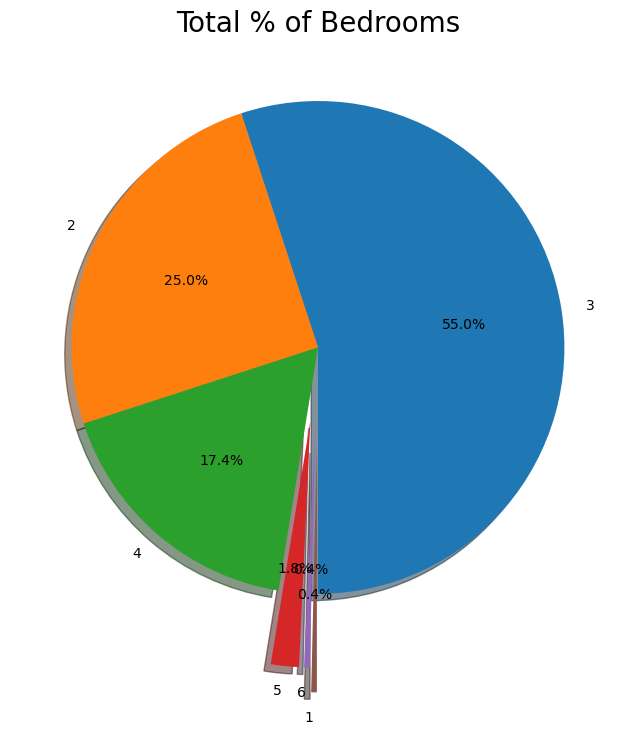

In [21]:
plt.figure(figsize=(10,8))
labels =house_data['bedrooms'].value_counts(sort = True).index
sizes = house_data['bedrooms'].value_counts(sort = True)
explode = (0.0, 0.0, 0.0, 0.3, 0.3, 0.4)
plt.pie(sizes, labels=labels,autopct='%1.1f%%', shadow=True, startangle=270,explode=explode)
plt.title('Total % of Bedrooms',size = 20)
plt.show()

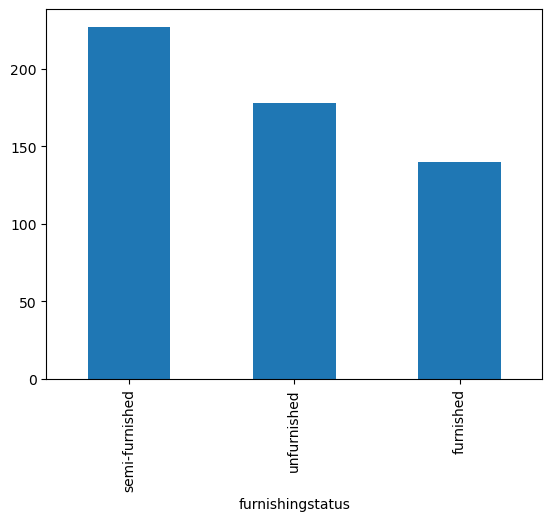

In [22]:
house_data['furnishingstatus'].value_counts().plot(kind='bar')
plt.show()

In [23]:
#### Bivariate Analysis

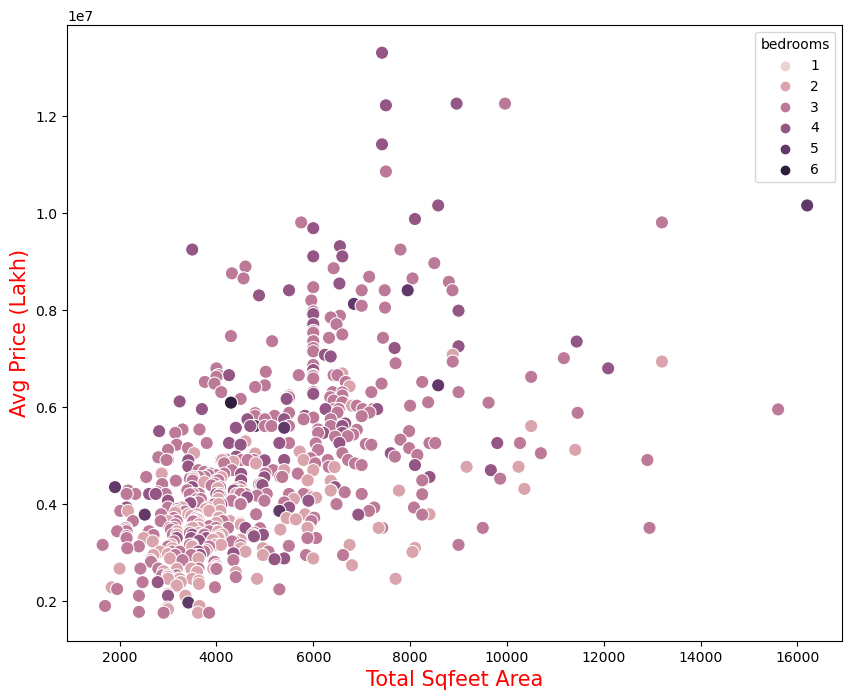

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='area',y='price',data=house_data,hue='bedrooms',s=90)
plt.xlabel("Total Sqfeet Area",size=15,c="r")
plt.ylabel("Avg Price (Lakh)",size=15,c="r")
plt.show()

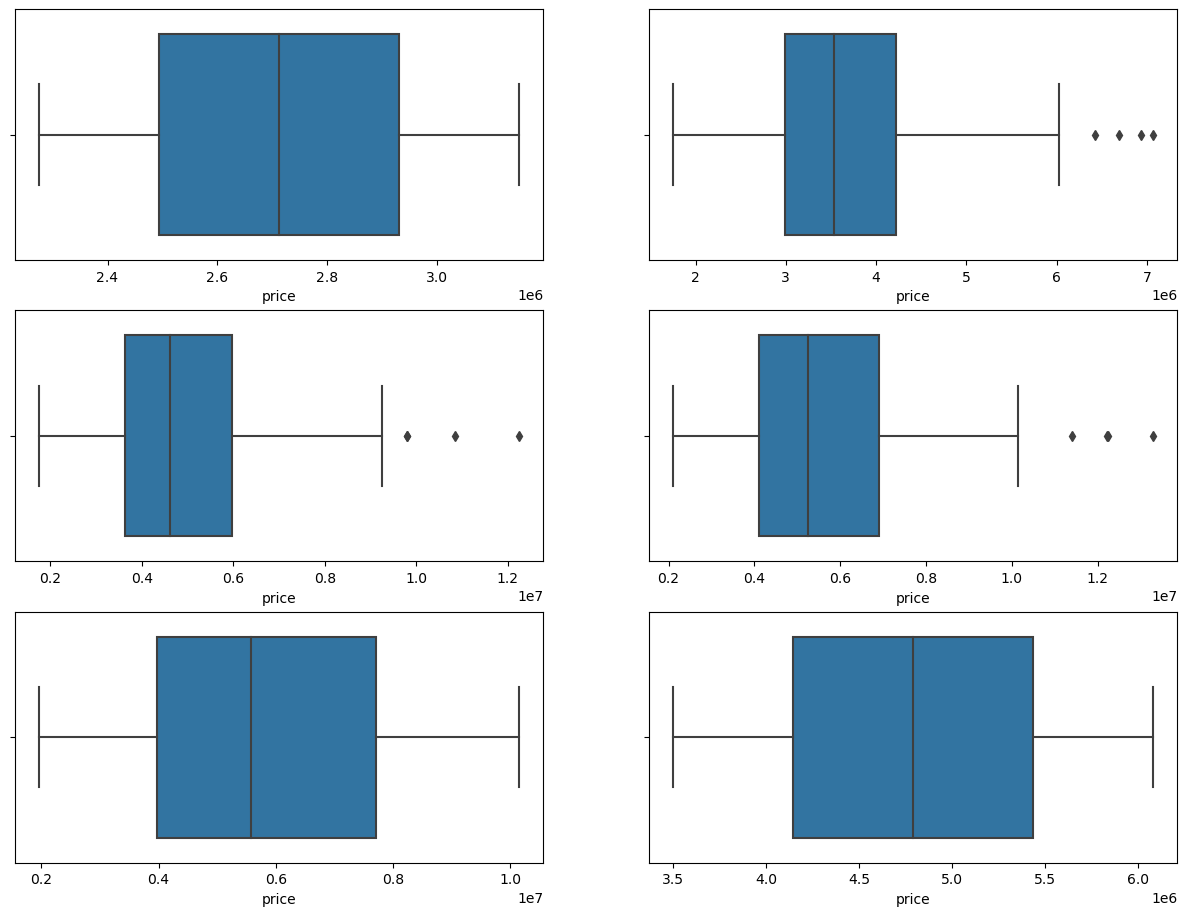

In [25]:
df_1=house_data[house_data['bedrooms']==1]
df_2=house_data[house_data['bedrooms']==2]
df_3=house_data[house_data['bedrooms']==3]
df_4=house_data[house_data['bedrooms']==4]
df_5=house_data[house_data['bedrooms']==5]
df_6=house_data[house_data['bedrooms']==6]
plt.figure(figsize=(15,15))
plt.subplot(4,2,1)
sns.boxplot(data=df_1,x=df_1['price'])
plt.subplot(4,2,2)
sns.boxplot(data=df_2,x=df_2['price'])
plt.subplot(4,2,3)
sns.boxplot(data=df_3,x=df_3['price'])
plt.subplot(4,2,4)
sns.boxplot(data=df_4,x=df_4['price'])
plt.subplot(4,2,5)
sns.boxplot(data=df_5,x=df_5['price'])
plt.subplot(4,2,6)
sns.boxplot(data=df_6,x=df_6['price'])
plt.show()

In [26]:
#### Multivariate Analysis

In [27]:

label_encoder =LabelEncoder()

for col in house_data.columns:
    if house_data[col].dtype == 'object': 
        house_data[col] = label_encoder.fit_transform(house_data[col])


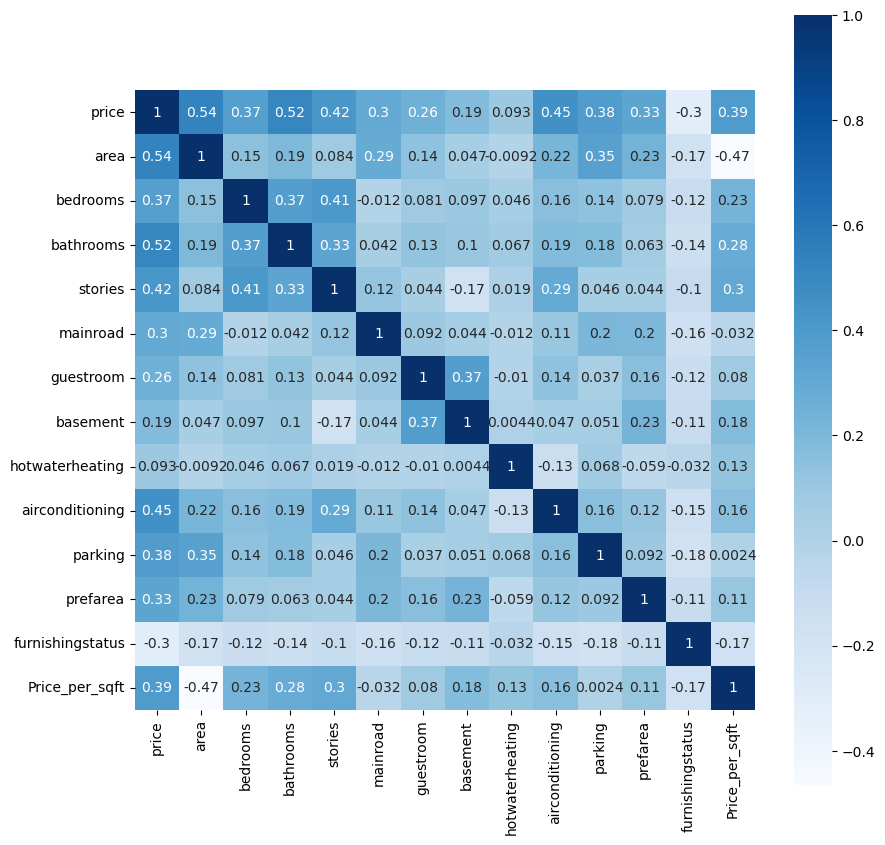

In [28]:
house_corr=house_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(house_corr,square=True,cbar=True,annot=True,cmap='Blues')
plt.show()

In [29]:
house_data

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,Price_per_sqft
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,1792.452830
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,1367.187500
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,1229.919679
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,1628.666667
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,1537.735849
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,2,606.666667
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,1,736.312500
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,2,483.425414
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,0,601.374570


In [30]:
### TRAIN_TEST_SPLIT

In [31]:
X=house_data.drop(columns=['price','prefarea','guestroom','basement','hotwaterheating','airconditioning'],axis=1)
Y=house_data['price']

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

In [33]:
print(X.shape,X_train.shape,X_test.shape)

(545, 8) (381, 8) (164, 8)


In [34]:
print(Y.shape,Y_train.shape,Y_test.shape)

(545,) (381,) (164,)


In [35]:
### Model Building

In [36]:
##### LinearRegression

In [37]:
lr_clf = LinearRegression()
lr_clf.fit(X_train,Y_train)

LR_prediction=lr_clf.predict(X_test)
print('R2 Score :',r2_score(LR_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(LR_prediction,Y_test))
print('MSE:',mean_squared_error(LR_prediction,Y_test))
rmse = sqrt(mean_squared_error(LR_prediction,Y_test))
print('RMSE:',rmse)

R2 Score : 78.08341580927096
MAE: 540044.3182787037
MSE: 678909455876.0598
RMSE: 823959.6202946233


In [38]:
##### DecisionTreeRegressor

In [39]:
DT = DecisionTreeRegressor()
DT.fit(X_train,Y_train)


DT_prediction=DT.predict(X_test)
print('R2 Score :',r2_score(DT_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(DT_prediction,Y_test))
print('MSE:',mean_squared_error(DT_prediction,Y_test))
rmse = sqrt(mean_squared_error(DT_prediction,Y_test))
print('RMSE:',rmse)

R2 Score : 85.34094099702489
MAE: 332392.01219512196
MSE: 339383091561.5854
RMSE: 582565.9546880382


In [40]:
##### RandomForestRegressor

In [41]:
RF=RandomForestRegressor()
RF.fit(X_train,Y_train)

RF_prediction=RF.predict(X_test)
print('R2 Score :',r2_score(RF_prediction,Y_test)*100)
print('MAE:',mean_absolute_error(RF_prediction,Y_test))
print('MSE:',mean_squared_error(RF_prediction,Y_test))
rmse = sqrt(mean_squared_error(RF_prediction,Y_test))
print('RMSE:',rmse)


R2 Score : 91.0410484558842
MAE: 194033.0
MSE: 204521062344.9939
RMSE: 452240.0494704045


In [42]:
pd.DataFrame(data={'Actual':Y_test,'Predicted':LR_prediction}).head()

,Actual,Predicted
482,2940000,2.739610e+06
314,4095000,4.087944e+06
383,3570000,3.874925e+06
487,2870000,2.979819e+06
43,7700000,7.433830e+06


In [43]:
X.head(5)

,area,bedrooms,bathrooms,stories,mainroad,parking,furnishingstatus,Price_per_sqft
0,7420,4,2,3,1,2,0,1792.452830
1,8960,4,4,4,1,3,0,1367.187500
2,9960,3,2,2,1,2,1,1229.919679
3,7500,4,2,2,1,3,0,1628.666667
4,7420,4,1,2,1,2,0,1537.735849


In [44]:
### Building a predictive System

In [45]:
Input_data=np.array([[7420,4,2,3,1,2,0,1792.452830]])
Predictive_system=RF.predict(Input_data)
print(Predictive_system)

[12391470.]


In [46]:
### Dumping our model

In [47]:
import pickle
with open("model.pkl","wb")as files:
    pickle.dump(RF,files)
     